In [1]:
%run ~/.python/init.ipynb
from mongo import *

IndexSlice (idx) loaded into namespace

Available functions
-------------------------------------------------------------
pmap(f, arr, n_jobs=-1, prefer='threads', verbose=10) loaded into namespace
put(value, filename) loaded into namespace
get(filename) loaded into namespace
-------------------------------------------------------------


MongoClient ('client') loaded into namespace
client = Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'vadmas_experiments')

    Available functions
    -------------------------------------------------------------
    get_experiments(query, db_filter=DEFAULT_FILTER, exps_only=False, **kwargs)
    get_metrics(exps, timestamps=False)")
    get_artifacts(exps)")
    delete_exp(exps, confirmed=False):")
    -------------------------------------------------------------
    


In [2]:
client.runs.distinct("experiment.name")

['vae_sanity_check',
 'vae_sanity_check_discrete',
 'continuous_sanity_check',
 'discrete_sanity_check',
 'log_vs_random',
 'baselines']

In [3]:
query = {"experiment.name": {"$in":["log_vs_random"]}}

In [8]:
cols = [
'learning_task',
'S',
'lr',
'seed',
'K',
'log_beta_min',
'loss',
'schedule',
'result.train_elbo', 
'result.train_logpx']

In [7]:
exps, df = get_experiments(query)

In [10]:
exps[cols]

,learning_task,S,lr,seed,K,log_beta_min,loss,schedule,result.train_elbo,result.train_logpx
_id,,,,,,,,,,
226,lin_reg,5,0.01,0,3,-1.09,tvo,log,-102.486328,-3.632321
227,lin_reg,5,0.01,1,3,-1.09,tvo,log,-118.556702,-3.710042
228,lin_reg,5,0.01,1,3,-1.09,tvo,random_uniform,-895.056274,-3.879967
229,lin_reg,5,0.01,1,50,-1.09,tvo,random_uniform,-752.249329,-3.936605
230,lin_reg,5,0.01,0,10,-1.09,tvo,random_uniform,-7146.592773,11.754438
231,lin_reg,5,0.01,0,10,-1.09,tvo,log,-102.589264,-3.628329
232,lin_reg,5,0.01,0,3,-1.09,tvo,random_uniform,-888.387390,-3.894844
233,lin_reg,5,0.01,1,10,-1.09,tvo,random_uniform,-761.853577,-3.937954
234,lin_reg,5,0.01,1,10,-1.09,tvo,log,-118.783821,-3.707865


<div class="alert alert-block alert-info"><h1> Bayes linear regression </h1> </div>

$$ 
\begin{align}
        &p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | 1, I_D) && \mathbf{w} \in \mathcal{R}^D\\
        &p(y_i |\mathbf{w}, \mathbf{x_i} ) = \mathcal{N}(y_i | \mathbf{x}_i^T\mathbf{w}, I_D) && \mathbf{x}_i \in \mathcal{R}^D, \mathbf{y}_i \in \mathcal{R} \\
        &p(\mathbf{w} | \mathbf{y}, \mathbf{x_i}) \propto p(\mathbf{w}, \mathbf{y} | \mathbf{x_i}) = p(\mathbf{w}) \prod_i p(y_i |\mathbf{w}, \mathbf{x_i}) \\
        &q_\phi(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mu, \sigma^2) && \mathbf{w} \in \mathcal{R}^D\\
\end{align}
$$

Learned parameters are $\phi = \{\mu, \sigma^2\}, N = 1000, D = 20 $

### Notes:
 - Same results across seeds (tried only two though)
 - lr == 0.01 best (compared to 1e-3, 1e-4)

In [25]:
exps.query("learning_task=='lin_reg' and S==5")[cols].sort_values(["K", "result.train_elbo"])

,learning_task,S,lr,seed,K,log_beta_min,loss,schedule,result.train_elbo,result.train_logpx
_id,,,,,,,,,,
228,lin_reg,5,0.01,1,3,-1.09,tvo,random_uniform,-895.056274,-3.879967
232,lin_reg,5,0.01,0,3,-1.09,tvo,random_uniform,-888.387390,-3.894844
227,lin_reg,5,0.01,1,3,-1.09,tvo,log,-118.556702,-3.710042
226,lin_reg,5,0.01,0,3,-1.09,tvo,log,-102.486328,-3.632321
230,lin_reg,5,0.01,0,10,-1.09,tvo,random_uniform,-7146.592773,11.754438
233,lin_reg,5,0.01,1,10,-1.09,tvo,random_uniform,-761.853577,-3.937954
234,lin_reg,5,0.01,1,10,-1.09,tvo,log,-118.783821,-3.707865
231,lin_reg,5,0.01,0,10,-1.09,tvo,log,-102.589264,-3.628329
238,lin_reg,5,0.01,0,50,-1.09,tvo,random_uniform,-1068.952148,-3.780096


In [26]:
exps.query("learning_task=='lin_reg' and S==10")[cols].sort_values(["K", "result.train_elbo"])

,learning_task,S,lr,seed,K,log_beta_min,loss,schedule,result.train_elbo,result.train_logpx
_id,,,,,,,,,,
281,lin_reg,10,0.01,1,3,-1.09,tvo,random_uniform,-1166.955078,-3.634333
280,lin_reg,10,0.01,0,3,-1.09,tvo,random_uniform,-791.276978,-3.932028
275,lin_reg,10,0.01,1,3,-1.09,tvo,log,-71.859711,-3.415526
274,lin_reg,10,0.01,0,3,-1.09,tvo,log,-63.276154,-3.345073
284,lin_reg,10,0.01,0,10,-1.09,tvo,random_uniform,-2146.810303,-1.850380
282,lin_reg,10,0.01,1,10,-1.09,tvo,random_uniform,-790.534485,-3.905096
277,lin_reg,10,0.01,1,10,-1.09,tvo,log,-72.343102,-3.426388
276,lin_reg,10,0.01,0,10,-1.09,tvo,log,-63.855885,-3.365507
283,lin_reg,10,0.01,0,50,-1.09,tvo,random_uniform,-1284.813477,-3.605573


In [27]:
exps.query("learning_task=='lin_reg' and S==50")[cols].sort_values(["K", "result.train_elbo"])

,learning_task,S,lr,seed,K,log_beta_min,loss,schedule,result.train_elbo,result.train_logpx
_id,,,,,,,,,,
329,lin_reg,50,0.01,1,3,-1.09,tvo,random_uniform,-3.867839e+06,1477.695923
328,lin_reg,50,0.01,0,3,-1.09,tvo,random_uniform,-7.450721e+02,-3.929856
323,lin_reg,50,0.01,1,3,-1.09,tvo,log,-2.221007e+01,-2.642586
322,lin_reg,50,0.01,0,3,-1.09,tvo,log,-1.836518e+01,-2.549179
330,lin_reg,50,0.01,0,10,-1.09,tvo,random_uniform,-1.225785e+03,-3.668476
331,lin_reg,50,0.01,1,10,-1.09,tvo,random_uniform,-7.870303e+02,-3.919877
326,lin_reg,50,0.01,1,10,-1.09,tvo,log,-2.360680e+01,-2.699884
325,lin_reg,50,0.01,0,10,-1.09,tvo,log,-1.975968e+01,-2.606620
332,lin_reg,50,0.01,0,50,-1.09,tvo,random_uniform,-3.011174e+03,0.694916


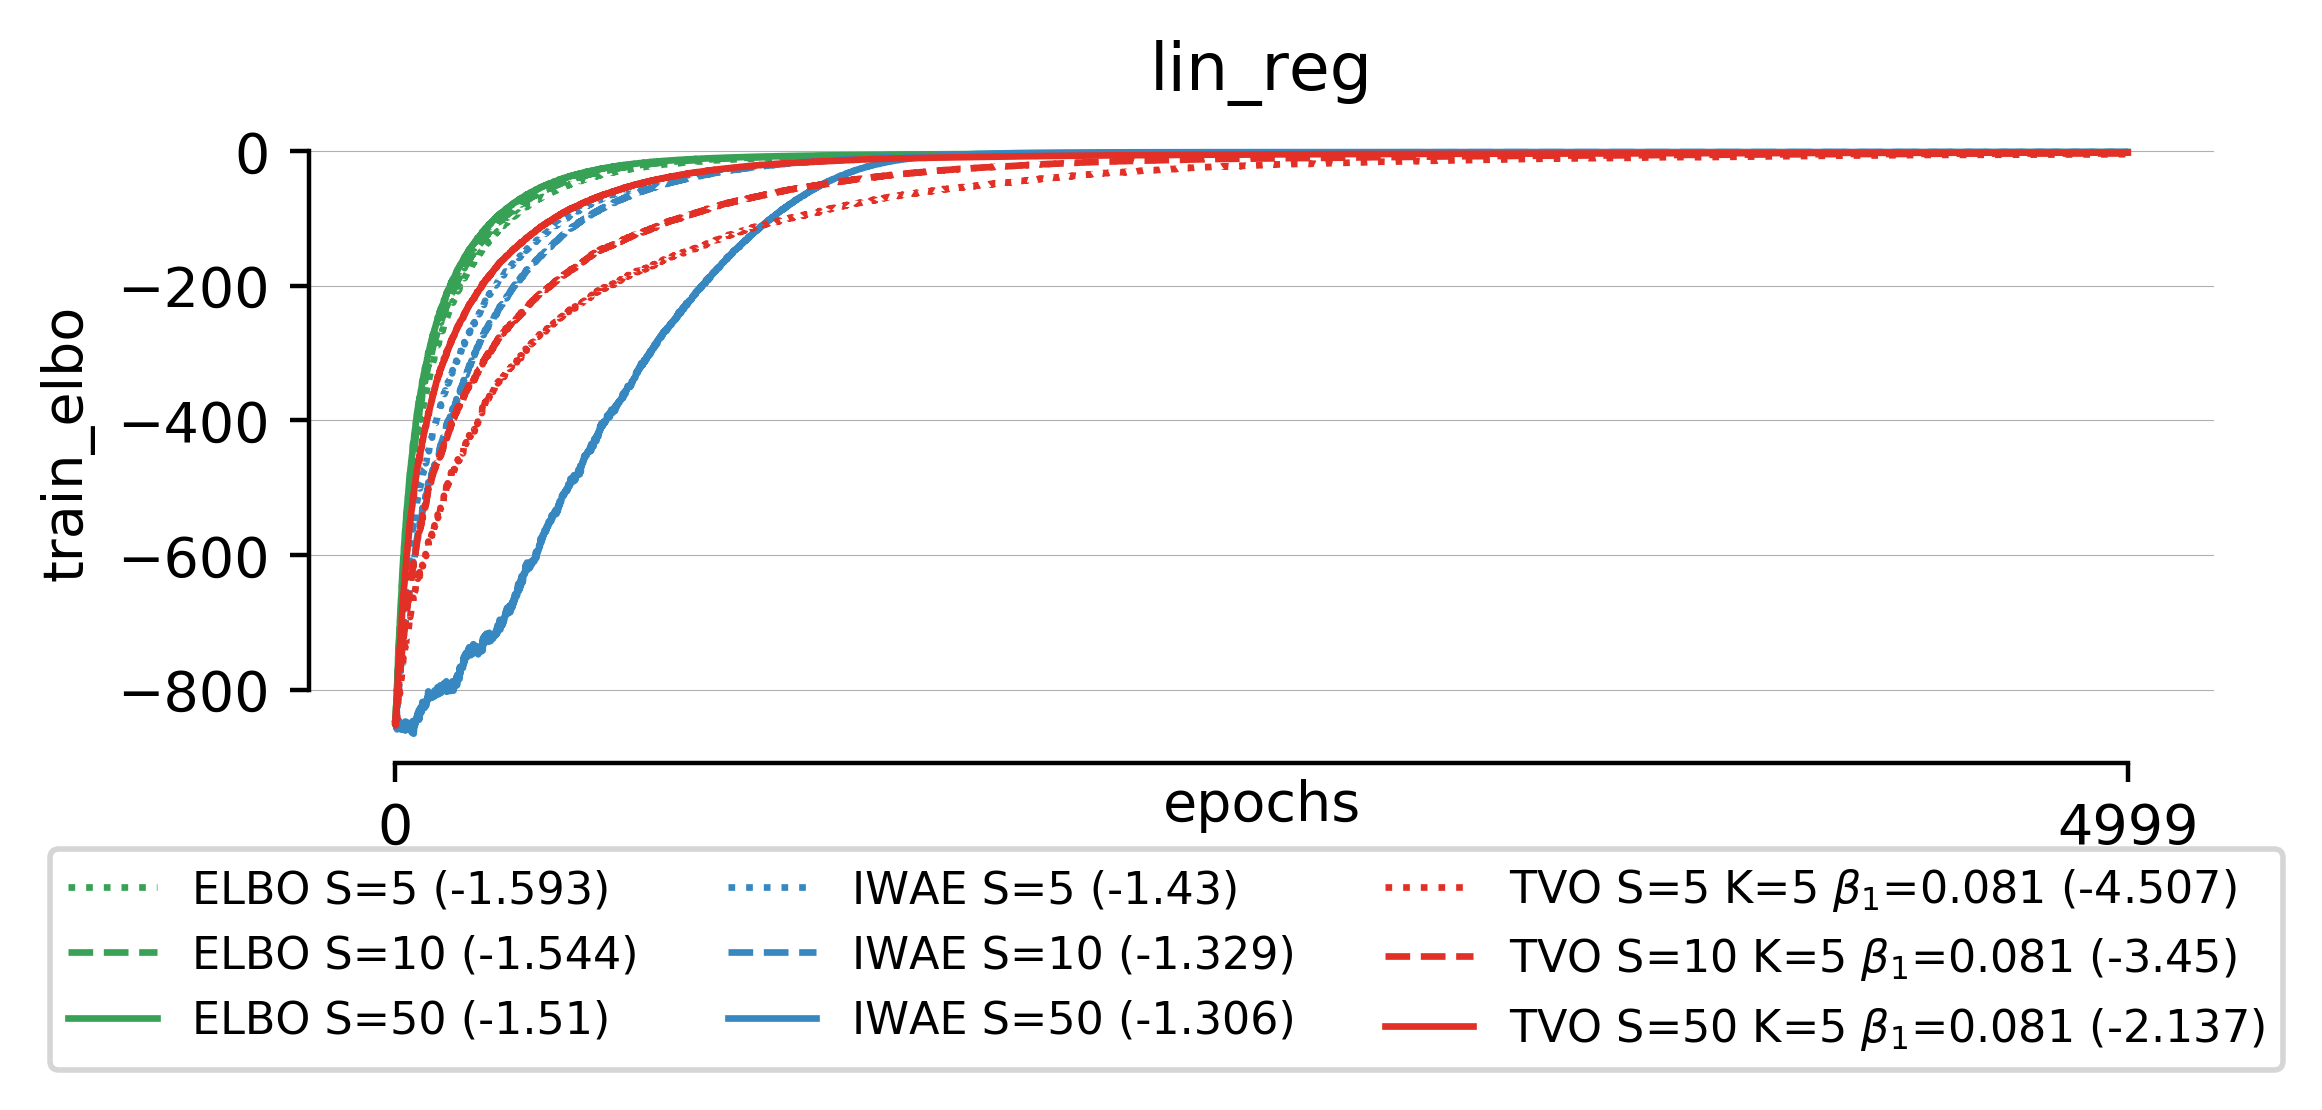

In [52]:
fig, (ax1) = plt.subplots(1, 1, dpi=200, figsize=(6, 3))

linestyle = {
    5:":",
    10:"--",
    50:"solid",
}

colors = {
    "tvo":sns.color_palette('Reds_d', 1)[0],
    "elbo":sns.color_palette('Greens_d', 1)[0],
    "iwae":sns.color_palette('Blues_d', 1)[0],
}

metric = 'train_elbo'
learning_task = 'lin_reg'

for loss in ['elbo', 'iwae', 'tvo']:
    selection = exps.query("loss == @loss and lr==0.01 and seed==1 and learning_task==@learning_task")
    for index, row in selection.sort_values(["S"]).iterrows():
        S, K, log_beta_min = row["S"], row["K"], row["log_beta_min"]

        values = df.loc[index, metric]['values'].values
        steps = df.loc[index, metric]['steps'].values

        if loss == 'tvo':
            label = r'{} S={} K={} $\beta_1$={} ({})'.format('TVO', S, K, round(10**log_beta_min, 3), round(values[-1], 3))
        else:
            label = r'{} S={} ({})'.format(loss.upper(), S, round(values[-1], 3))
                
        ax1.plot(steps,
                 values,
                 color = colors[loss],
                 linestyle = linestyle[S],
                 linewidth = 1.2,
                 label = label)
                            
        
ax1.grid(True, axis='y', linewidth=0.2)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
leg = ax1.legend(fontsize=8, ncol=3, bbox_to_anchor=(0.45, -0.1), loc='upper center')

ax1.set_ylabel(metric)
ax1.set_xlabel("epochs")
ax1.set_title(learning_task)
ax1.xaxis.set_label_coords(0.5, -0.025)

xmax = df.steps.max()

ax1.set_xticks([0, xmax])
ax1.set_xticklabels([0, str(xmax)])
sns.despine(ax=ax1, trim=True)

fig.tight_layout()


<div class="alert alert-block alert-info"><h1> bayes log reg </h1> </div>

$$ 
\begin{align}
        &p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | 1, I_D) && \mathbf{w} \in \mathcal{R}^D\\
        &p(y_i |\mathbf{w}, \mathbf{x_i} ) = \mathcal{Bern}(y_i | \mathbf{x}_i^T\mathbf{w}) && \mathbf{x}_i \in \mathcal{R}^D, \mathbf{y}_i \in \{0, 1\} \\
        &p(\mathbf{w} | \mathbf{y}, \mathbf{x_i}) \propto p(\mathbf{w}, \mathbf{y} | \mathbf{x_i}) = p(\mathbf{w}) \prod_i p(y_i |\mathbf{w}, \mathbf{x_i}) \\
        &q_\phi(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mu, \sigma^2) && \mathbf{w} \in \mathcal{R}^D\\
\end{align}
$$

Learned parameters are $\phi = \{\mu, \sigma^2\}, N = 1000, D = 20 $

### Notes:
 - More unstable than blr 
 - iwae crashes sometimes
 - elbo and tvo stable at higher learning rates, iwae isn't
 - elbo not stable at 0.01, tvo is

In [66]:
exps.query("lr==0.01 and seed==1 and learning_task=='log_reg'")[cols].sort_values('loss')

,learning_task,S,lr,seed,log_beta_min,loss,result.train_elbo,result.train_logpx
_id,,,,,,,,
74,log_reg,5,0.01,1,-1.09,elbo,1.129032e+01,1.138940e+01
146,log_reg,50,0.01,1,-1.09,elbo,1.513648e+01,1.531415e+01
79,log_reg,5,0.01,1,-1.09,iwae,1.126120e+21,3.100829e+21
152,log_reg,50,0.01,1,-1.09,iwae,7.454837e+20,2.412566e+21
68,log_reg,5,0.01,1,-1.09,tvo,-1.983466e+00,-1.227932e-01
104,log_reg,10,0.01,1,-1.09,tvo,-1.299898e+00,-1.267577e-01
140,log_reg,50,0.01,1,-1.09,tvo,-5.634126e-01,-4.847009e-02


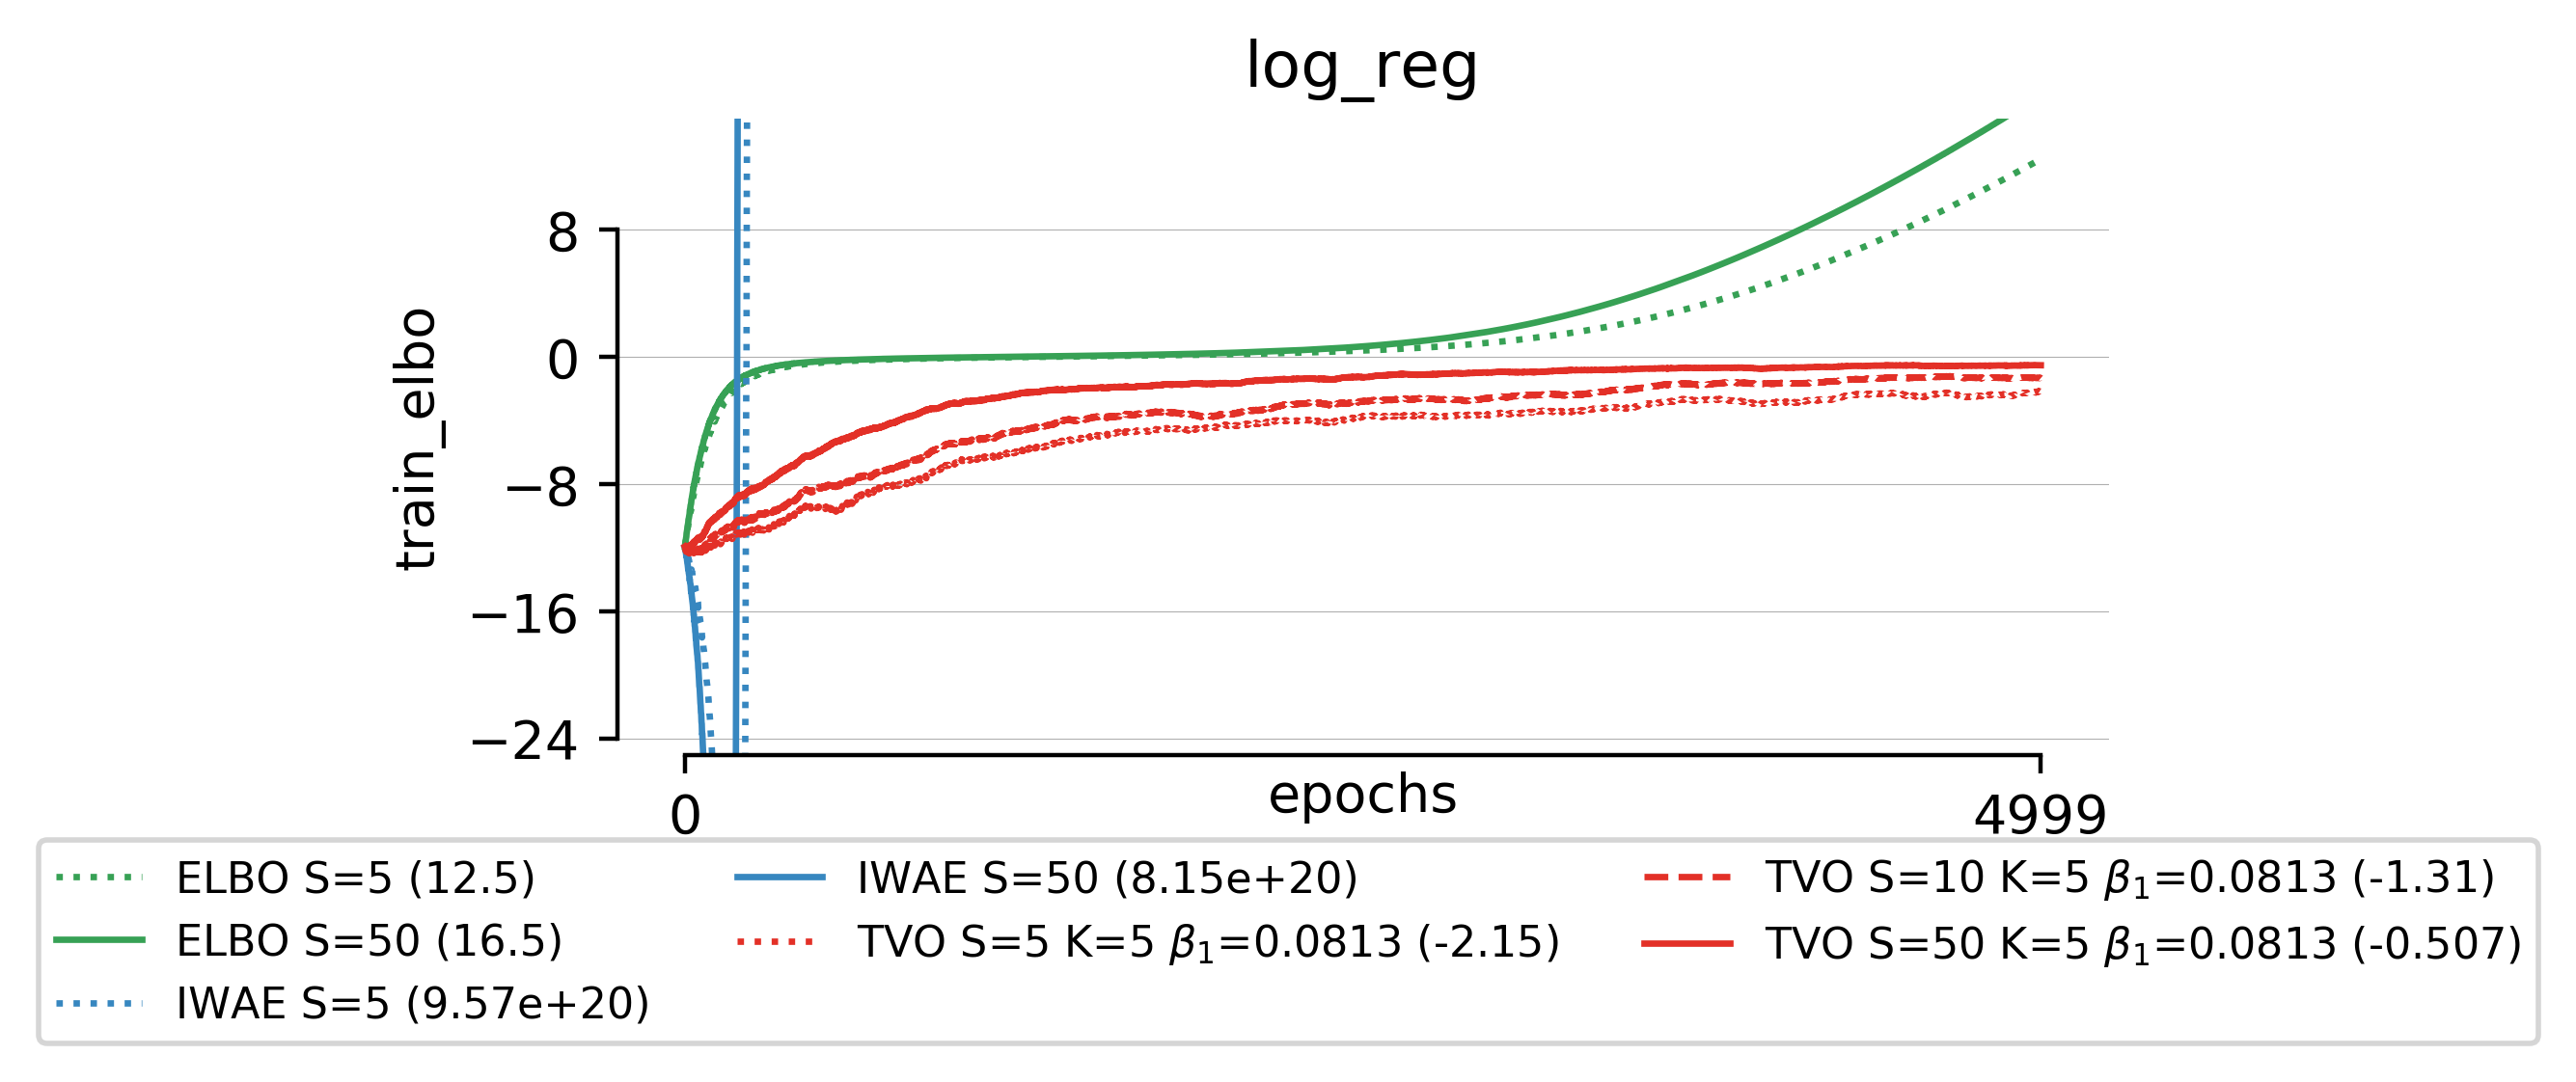

In [91]:
fig, (ax1) = plt.subplots(1, 1, dpi=200, figsize=(6, 3))

linestyle = {
    5:":",
    10:"--",
    50:"solid",
}

colors = {
    "tvo":sns.color_palette('Reds_d', 1)[0],
    "elbo":sns.color_palette('Greens_d', 1)[0],
    "iwae":sns.color_palette('Blues_d', 1)[0],
}

metric = 'train_elbo'
learning_task = 'log_reg'
lr = 0.01
seed = 0

for loss in ['elbo', 'iwae', 'tvo']:
    selection = exps.query("loss == @loss and lr==@lr and seed==@seed and learning_task==@learning_task")
    for index, row in selection.sort_values(["S"]).iterrows():
        S, K, log_beta_min = row["S"], row["K"], row["log_beta_min"]

        values = df.loc[index, metric]['values'].values
        steps = df.loc[index, metric]['steps'].values
        
        if loss == 'tvo':
            label = r'{} S={} K={} $\beta_1$={:.3g} ({:.3g})'.format('TVO', S, K, 10**log_beta_min, values[-1])
        else:
            label = r'{} S={} ({:.3g})'.format(loss.upper(), S, values[-1])
                
        ax1.plot(steps,
                 values,
                 color = colors[loss],
                 linestyle = linestyle[S],
                 linewidth = 1.2,
                 label = label)
                            
        
ax1.set_ylim(-25, 15)
ax1.grid(True, axis='y', linewidth=0.2)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
leg = ax1.legend(fontsize=8, ncol=3, bbox_to_anchor=(0.45, -0.1), loc='upper center')

ax1.set_ylabel(metric)
ax1.set_xlabel("epochs")
ax1.set_title(learning_task)
ax1.xaxis.set_label_coords(0.5, -0.025)

xmax = df.steps.max()

ax1.set_xticks([0, xmax])
ax1.set_xticklabels([0, str(xmax)])
sns.despine(ax=ax1, trim=True)

fig.tight_layout()


<div class="alert alert-block alert-info"><h1> gmm </h1> </div>

In [4]:
# 'discrete_sanity_check'
query = {"experiment.name": {"$in":["discrete_sanity_check"]}}
exps, df = get_experiments(query)

/Users/vmasrani/.python/mongo.py:69: UserWarning: Persisting input arguments took 1.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return exps, get_metrics(query_result, **kwargs)


In [45]:
for i in exps['start_time']:
    print(i)

2020-01-03 04:48:56.500000
2020-01-03 04:49:12.534000
2020-01-03 04:49:14.824000
2020-01-03 04:49:14.847000
2020-01-03 04:49:15.252000
2020-01-03 04:49:16.430000
2020-01-03 04:49:45.118000
2020-01-03 04:49:45.119000
2020-01-03 04:49:45.731000
2020-01-03 22:15:00.391000
2020-01-03 22:15:00.389000
2020-01-03 22:15:00.395000
2020-01-03 22:15:00.402000
2020-01-03 22:15:00.407000
2020-01-03 22:15:00.405000
2020-01-03 22:15:00.410000
2020-01-03 22:15:00.502000
2020-01-03 22:15:00.508000
2020-01-03 22:15:00.514000
2020-01-03 22:15:00.511000
2020-01-03 22:15:00.520000
2020-01-03 22:15:00.528000
2020-01-03 22:15:00.527000
2020-01-03 22:31:46.445000
2020-01-03 22:31:46.444000
2020-01-03 23:00:09.633000
2020-01-03 23:00:09.638000
2020-01-03 23:04:36.784000
2020-01-03 23:04:36.783000
2020-01-03 23:14:57.880000
2020-01-03 23:14:57.883000
2020-01-03 23:14:57.907000
2020-01-03 23:15:08.722000
2020-01-03 23:15:08.740000
2020-01-03 23:15:08.741000
2020-01-03 23:15:08.741000
2020-01-03 23:15:43.799000
2

$$ 
\begin{align}
        &p(\mathbf{z}) = \mathcal{Cat}(\theta) && \theta \in \mathcal{R}^K\\
        &p(x_i |\mathbf{z_i} ) = \mathcal{N}(x_i | \mu_{z_i}, \sigma^2_{z_i} I) \\
        &p(\mathbf{z_i} | x_i) \propto p(x_i, \mathbf{z_i}) = p(x_i|\mathbf{z_i})p(\mathbf{z})\\
        &q_\phi(z_i) = \mathcal{Cat}(\phi_i) && \phi_i \in \mathcal{R}^K
\end{align}
$$

Learned parameters are $\phi = \{\phi_0, \phi_1, ..., \phi_N \}, N = 1000, K = 20 $, $\theta$ initialized according to https://arxiv.org/abs/1805.10469

In [ ]:
exps

In [9]:
exps.query("learning_task=='gmm' ")[cols].sort_values('loss').dropna()

,learning_task,S,lr,seed,log_beta_min,loss,result.train_elbo,result.train_logpx
_id,,,,,,,,
173,gmm,5,0.0010,0,-1.09,reinforce,-22.513819,-6.374585
180,gmm,5,0.0100,0,-1.09,reinforce,-5.857172,-5.728502
216,gmm,50,0.0010,1,-1.09,reinforce,-16.440020,-6.831696
217,gmm,50,0.0010,0,-1.09,reinforce,-16.416481,-6.620926
218,gmm,50,0.0001,1,-1.09,reinforce,-102.112595,-8.237401
219,gmm,50,0.0001,0,-1.09,reinforce,-106.540062,-7.874698
157,gmm,5,0.0100,0,-1.09,tvo,-9.227697,-7.841969
190,gmm,10,0.0100,1,-1.09,tvo,-11.949700,-8.972639
158,gmm,5,0.0100,1,-1.09,tvo,-9.384723,-7.960165


In [58]:
# lr = 0.001
# seed = 0
learning_task = 'gmm'
S = 10
loss = 'vimco'
exps.query("loss==@loss and learning_task==@learning_task")[cols].dropna().sort_values('result.train_elbo')

,learning_task,S,lr,seed,log_beta_min,loss,result.train_elbo,result.train_logpx
_id,,,,,,,,
188,gmm,5,0.0001,0,-1.09,vimco,-126.540237,-8.278379
189,gmm,5,0.0001,1,-1.09,vimco,-122.622826,-8.509537
223,gmm,50,0.0010,0,-1.09,vimco,-107.153412,-7.382348
222,gmm,50,0.0010,1,-1.09,vimco,-101.219467,-7.831392
203,gmm,10,0.0010,0,-1.09,vimco,-87.070442,-7.991799
202,gmm,10,0.0010,1,-1.09,vimco,-85.126091,-8.486797
201,gmm,10,0.0100,0,-1.09,vimco,-34.868576,-7.634632
200,gmm,10,0.0100,1,-1.09,vimco,-33.705269,-7.624457


In [65]:
# lr = 0.001
# seed = 0
learning_task = 'gmm'
S = 5
loss = 'reinforce'
exps.query("S==@S and loss==@loss and learning_task==@learning_task")[cols].dropna().sort_values('result.train_elbo')

,learning_task,S,lr,seed,log_beta_min,loss,result.train_elbo,result.train_logpx
_id,,,,,,,,
173,gmm,5,0.001,0,-1.09,reinforce,-22.513819,-6.374585
180,gmm,5,0.010,0,-1.09,reinforce,-5.857172,-5.728502


In [73]:
ids = [172, 190, 200, 189, 222, 217, 180,]

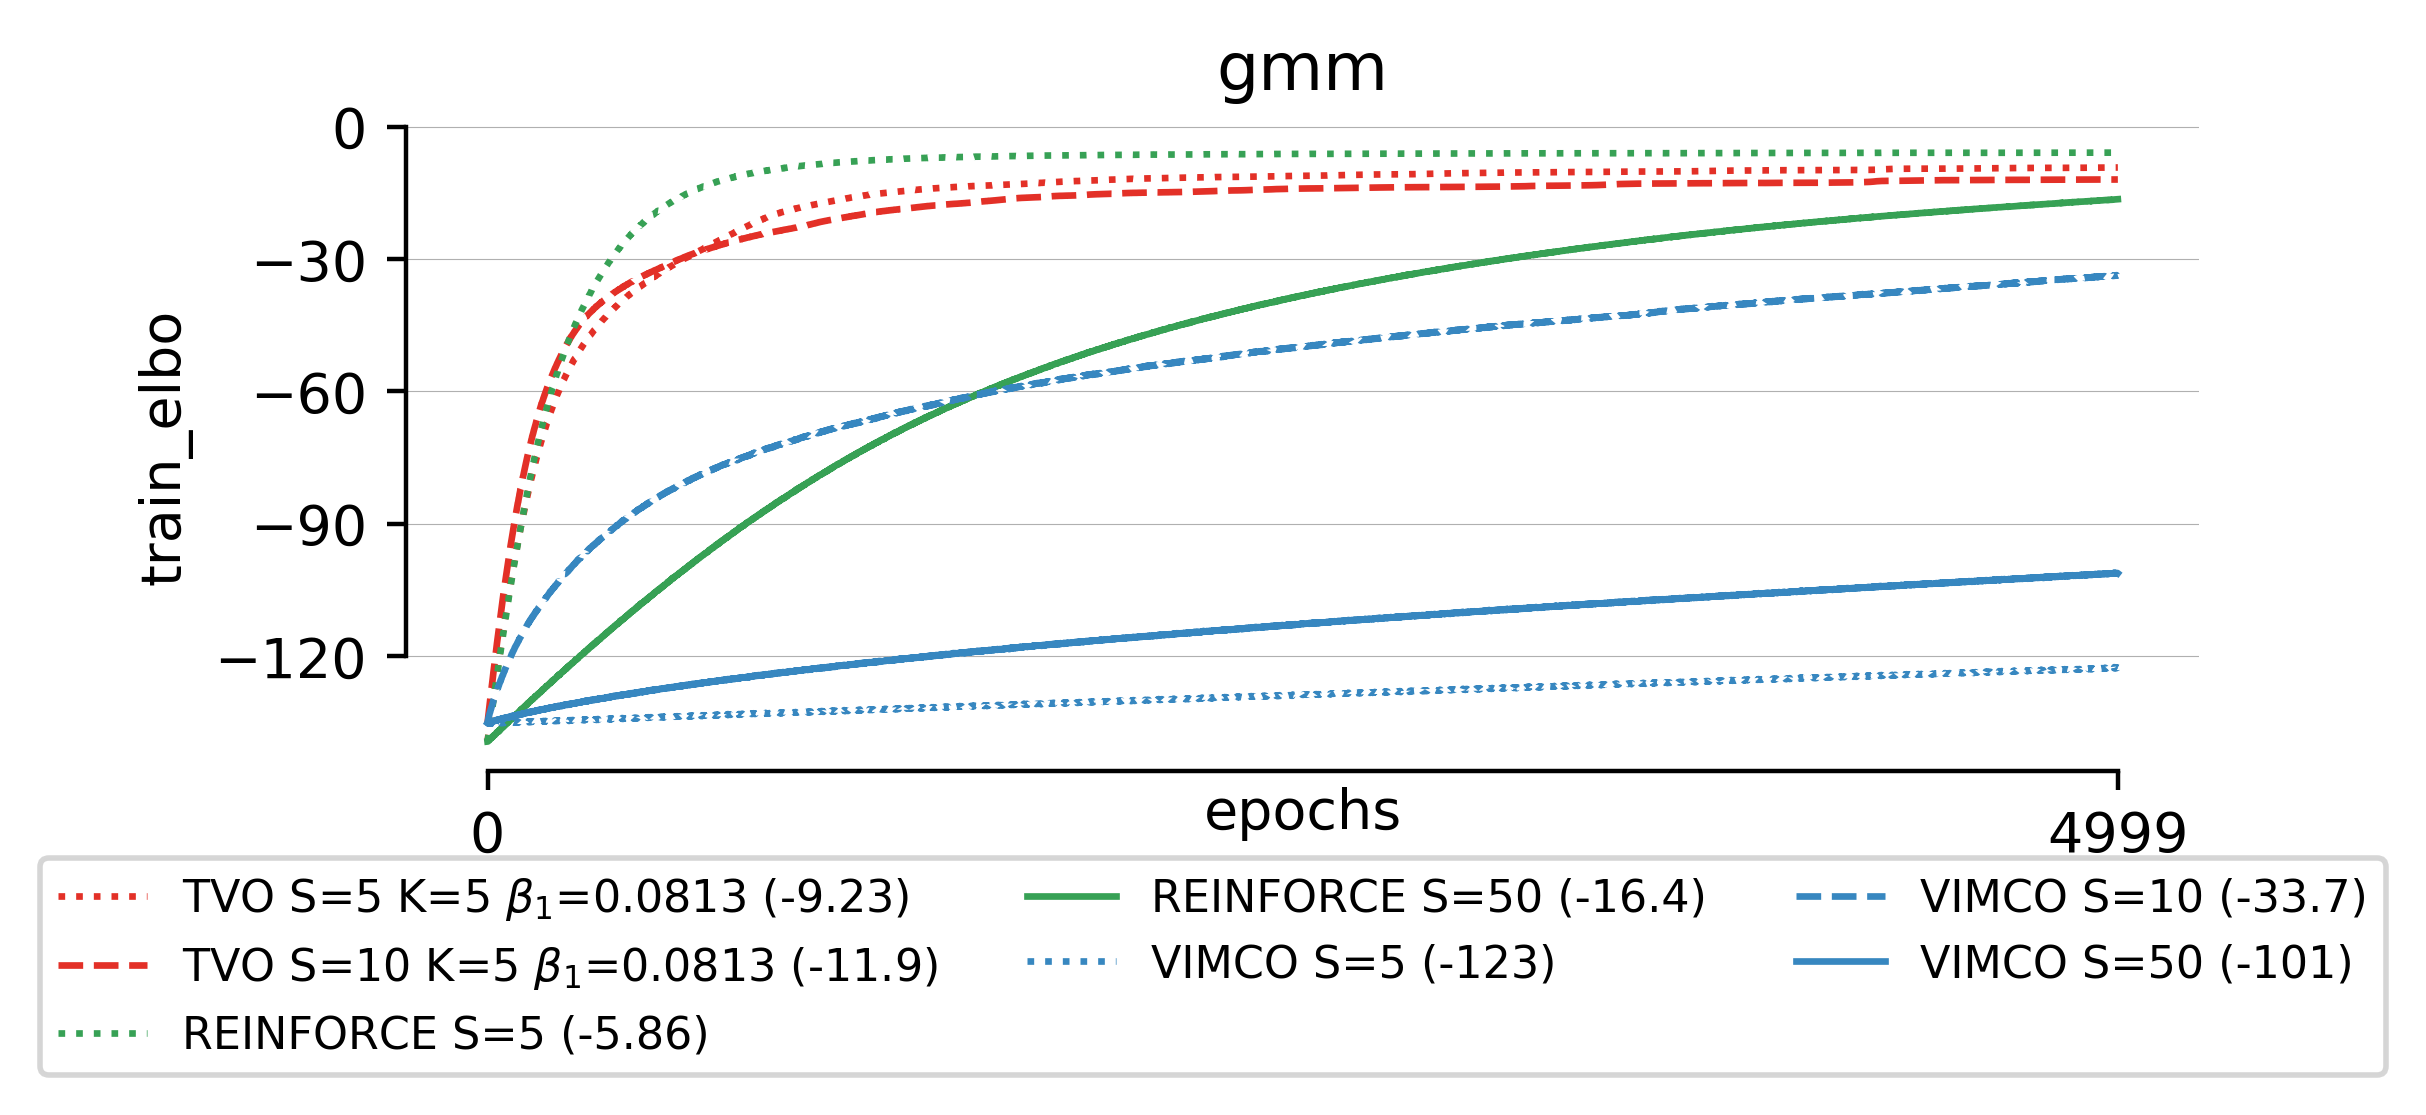

In [74]:
fig, (ax1) = plt.subplots(1, 1, dpi=200, figsize=(6, 3))

linestyle = {
    5:":",
    10:"--",
    50:"solid",
}

colors = {
    "tvo":sns.color_palette('Reds_d', 1)[0],
    "reinforce":sns.color_palette('Greens_d', 1)[0],
    "vimco":sns.color_palette('Blues_d', 1)[0],
}

metric = 'train_elbo'
learning_task = 'gmm'
# lr = 0.01
# seed = 0

for loss in ['tvo', 'reinforce', 'vimco']:
    selection = exps.loc[ids].query("loss == @loss")
    for index, row in selection.sort_values(["S"]).iterrows():
        S, K, log_beta_min = row["S"], row["K"], row["log_beta_min"]

        values = df.loc[index, metric]['values'].values
        steps = df.loc[index, metric]['steps'].values
        
        if loss == 'tvo':
            label = r'{} S={} K={} $\beta_1$={:.3g} ({:.3g})'.format('TVO', S, K, 10**log_beta_min, values[-1])
        else:
            label = r'{} S={} ({:.3g})'.format(loss.upper(), S, values[-1])
                
        ax1.plot(steps,
                 values,
                 color = colors[loss],
                 linestyle = linestyle[S],
                 linewidth = 1.2,
                 label = label)
                            
        
# ax1.set_ylim(-25, 15)
ax1.grid(True, axis='y', linewidth=0.2)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
leg = ax1.legend(fontsize=8, ncol=3, bbox_to_anchor=(0.45, -0.1), loc='upper center')

ax1.set_ylabel(metric)
ax1.set_xlabel("epochs")
ax1.set_title(learning_task)
ax1.xaxis.set_label_coords(0.5, -0.025)

xmax = df.steps.max()

ax1.set_xticks([0, xmax])
ax1.set_xticklabels([0, str(xmax)])
sns.despine(ax=ax1, trim=True)

fig.tight_layout()
